In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [6]:
sp=pd.read_csv('StudentsPerformance.csv')

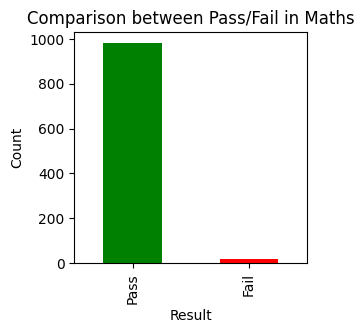

,count
pass_math,
Pass,981
Fail,19


In [7]:
passingmark=33
sp['pass_math'] = np.where(sp['math score']>= passingmark, 'Pass', 'Fail')
sp['pass_math'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (3,3))

plt.title('Comparison between Pass/Fail in Maths')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_math'].value_counts()

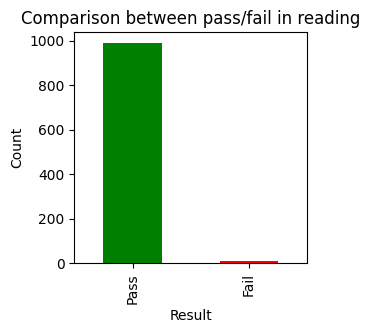

,count
pass_read,
Pass,989
Fail,11


In [10]:
sp['pass_read']=np.where(sp['reading score']>=passingmark, 'Pass','Fail')
sp['pass_read'].value_counts(dropna=False).plot.bar(color=['green','red'],figsize=(3,3))
plt.title('Comparison between pass/fail in reading')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_read'].value_counts()

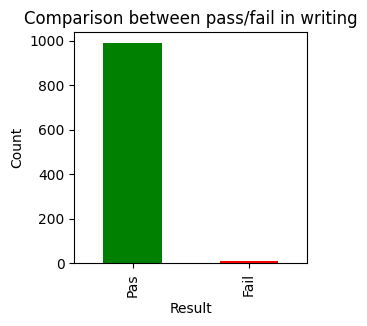

,count
pass_write,
Pas,988
Fail,12


In [11]:
sp['pass_write']=np.where(sp['writing score']>=passingmark,'Pas','Fail' )
sp['pass_write'].value_counts(dropna=False).plot.bar(color=['green','red'],figsize=(3,3))
plt.title('Comparison between pass/fail in writing')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_write'].value_counts()

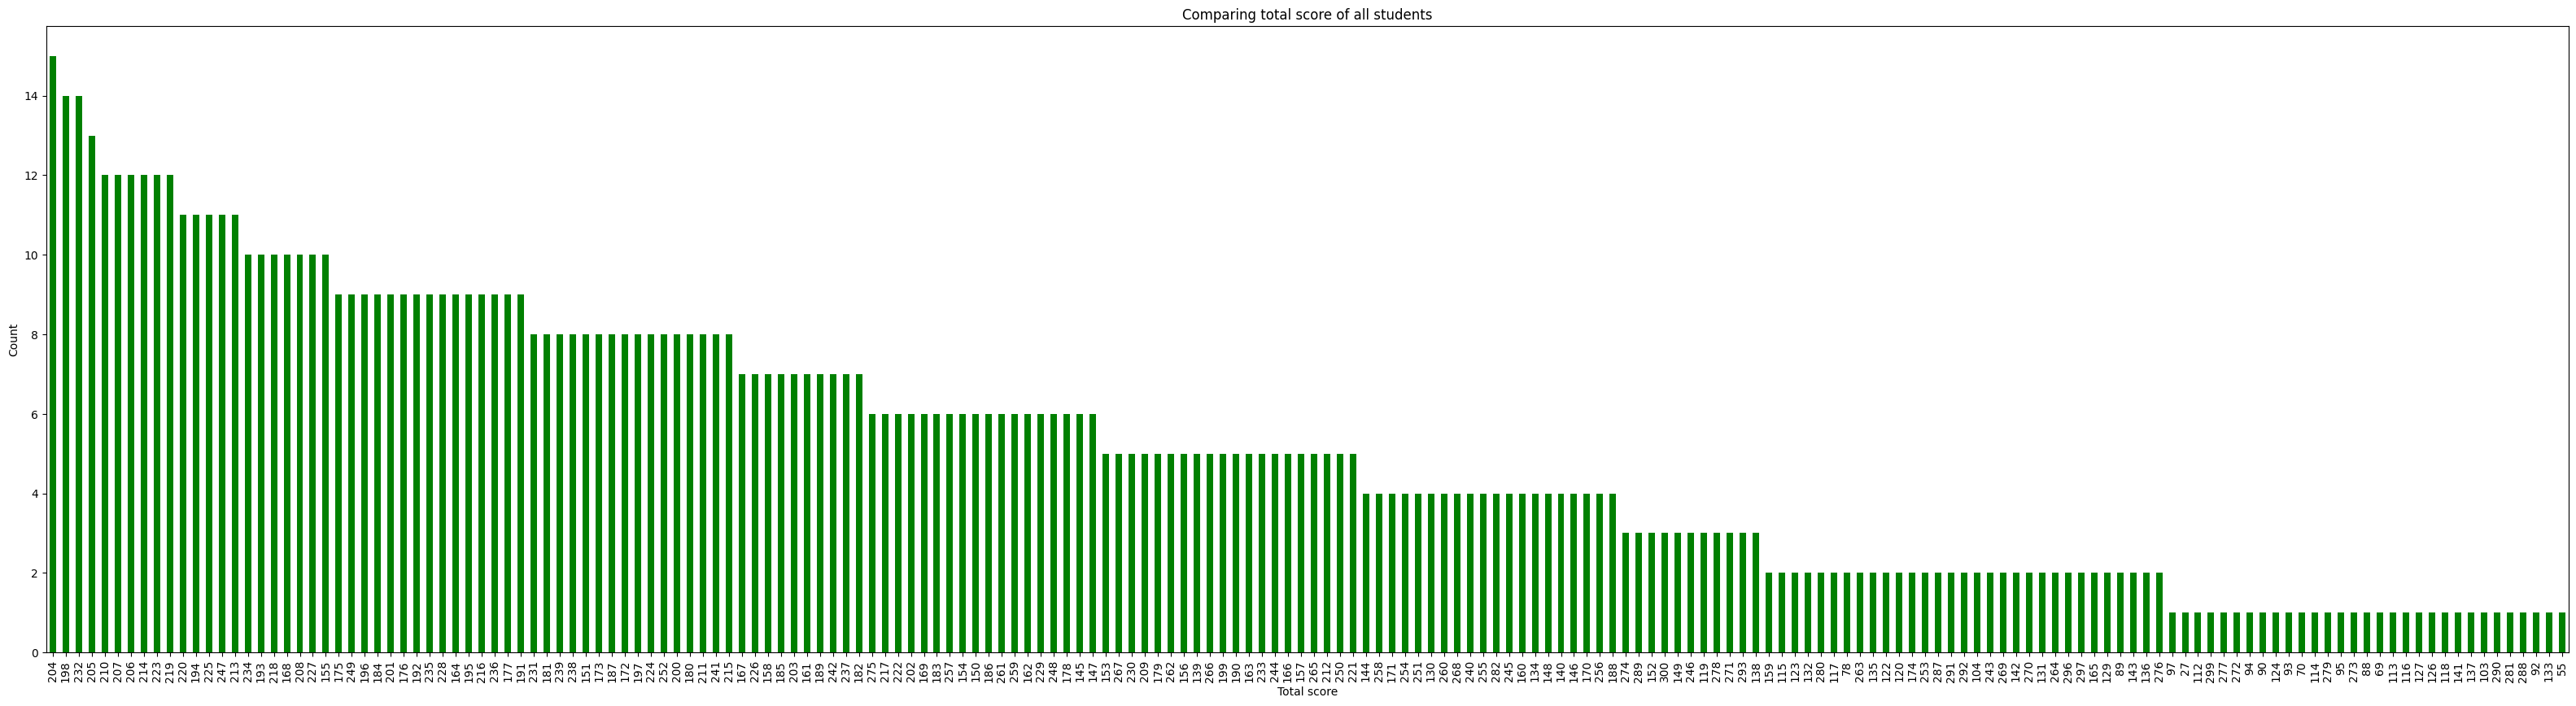

In [12]:
sp['total_score']=sp['math score']+sp['reading score']+sp['writing score']

sp['total_score'].value_counts(normalize=True)
sp['total_score'].value_counts(dropna=True).plot.bar(color='green',figsize=(40,10))

plt.title('Comparing total score of all students')
plt.xlabel('Total score')
plt.ylabel('Count')
plt.show()